In [144]:
import pandas as pd
import numpy as np 

In [145]:
data = np.genfromtxt('advertising.csv', delimiter=',', skip_header=1).tolist()
data[:5]

[[230.1, 37.8, 69.2, 22.1],
 [44.5, 39.3, 45.1, 10.4],
 [17.2, 45.9, 69.3, 12.0],
 [151.5, 41.3, 58.5, 16.5],
 [180.8, 10.8, 58.4, 17.9]]

In [146]:
def get_column(data, index):
    column = [row[index] for row in data]
    return column

tv = get_column(data[:5], 0)
radio = get_column(data[:5], 1)
news = get_column(data[:5], 2)
sales = get_column(data[:5], 3)

print(tv)
print(radio)
print(news)
print(sales)

[230.1, 44.5, 17.2, 151.5, 180.8]
[37.8, 39.3, 45.9, 41.3, 10.8]
[69.2, 45.1, 69.3, 58.5, 58.4]
[22.1, 10.4, 12.0, 16.5, 17.9]


In [147]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    
    tv = get_column(data, 0)
    radio = get_column(data, 1)
    news = get_column(data, 2)
    sales = get_column(data, 3)

    X = [tv, radio, news]
    y = sales
    
    return X, y
    
X, y = prepare_data('advertising.csv')    
print('X:', X[0])
print('y:', y)

list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)


X: [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7, 23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3, 218.4, 237.4, 13.2, 228.3, 62.3, 262.9, 142.9, 240.1, 248.8, 70.6, 292.9, 112.9, 97.2, 265.6, 95.7, 290.7, 266.9, 74.7, 43.1, 228.0, 202.5, 177.0, 293.6, 206.9, 25.1, 175.1, 89.7, 239.9, 227.2, 66.9, 199.8, 100.4, 216.4, 182.6, 262.7, 198.9, 7.3, 136.2, 210.8, 210.7, 53.5, 261.3, 239.3, 102.7, 131.1, 69.0, 31.5, 139.3, 237.4, 216.8, 199.1, 109.8, 26.8, 129.4, 213.4, 16.9, 27.5, 120.5, 5.4, 116.0, 76.4, 239.8, 75.3, 68.4, 213.5, 193.2, 76.3, 110.7, 88.3, 109.8, 134.3, 28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9, 25.0, 90.4, 13.1, 255.4, 225.8, 241.7, 175.7, 209.6, 78.2, 75.1, 139.2, 76.4, 125.7, 19.4, 141.3, 18.8, 224.0, 123.1, 229.5, 87.2, 7.8, 80.2, 220.3, 59.6, 0.7, 265.2, 8.4, 219.8, 36.9, 48.3, 25.6, 273.7, 43.0, 184.9, 73.4, 193.7, 220.5, 104.6, 96.2, 140.3, 240.1, 243.2, 38.0, 44.7, 280.7, 12

In [148]:
def initialize_params():
    # w1 = random.gauss(mu=0.0, sigma=0.01)
    # w2 = random.gauss(mu=0.0, sigma=0.01)
    # w3 = random.gauss(mu=0.0, sigma=0.01)
    # b  = 0
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    
    return w1, w2, w3, b


# initialize model's parameters
w1, w2, w3, b = initialize_params()
print(w1, w2, w3, b)

0.016992259082509283 0.0070783670518262355 -0.002307860847821344 0


In [149]:
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1*x1 + w2*x2 + w3*x3 + b

def compute_gradient_w(x, ypred, y):
    return 2*x*(ypred - y)

def compute_gradient_b(ypred, y):
    return 2*(ypred - y)

g_wi = compute_gradient_w(1.0, 0.5, 1.0)
print (g_wi)

g_b = compute_gradient_b(0.5, 2)
print (g_b)



-1.0
-3.0


In [150]:
def update_parameter(w, dL, learning_rate):
    w = w - learning_rate*dL
    return w

after_wi = update_parameter(0.5, -1.0, 1e-5)
print (after_wi)

0.50001


In [151]:
def compute_loss(ypred, y):
    return (ypred - y)**2

l = compute_loss(ypred=1, y=0.5)
print(l)

0.25


In [152]:
def implement_linear_regression(X_data, y_data, epoch_max, lr):
    losses = []
    N = len(y_data) 
    
    w1, w2, w3, b = initialize_params()
    
    for epoch in range(epoch_max):
        for i in range(N):
            x1 = X_data[0][i] # tv
            x2 = X_data[1][i] # radio
            x3 = X_data[2][i] # news
         
            y = y_data[i] # price
            
            ypred = predict(x1, x2, x3, w1, w2, w3, b)
            loss = compute_loss(ypred, y)
            
            dLw1 = compute_gradient_w(x1, ypred, y)
            dLw2 = compute_gradient_w(x2, ypred, y)
            dLw3 = compute_gradient_w(x3, ypred, y)
            dLb = compute_gradient_b(ypred, y)
            
            w1 = update_parameter(w1, dLw1, learning_rate=lr)
            w2 = update_parameter(w2, dLw2, learning_rate=lr)
            w3 = update_parameter(w3, dLw3, learning_rate=lr)
            b = update_parameter(b, dLb, learning_rate=lr)
        
            if len(losses) < 20000:
                losses.append(loss)

    return (w1, w2, w3, b, losses) 
        
    
    
X_data, y_data = prepare_data('advertising.csv')    
epoch_max = 50
lr = 1e-5
w1, w2, w3, b, losses = implement_linear_regression(X_data, y_data, epoch_max=epoch_max, lr=lr)

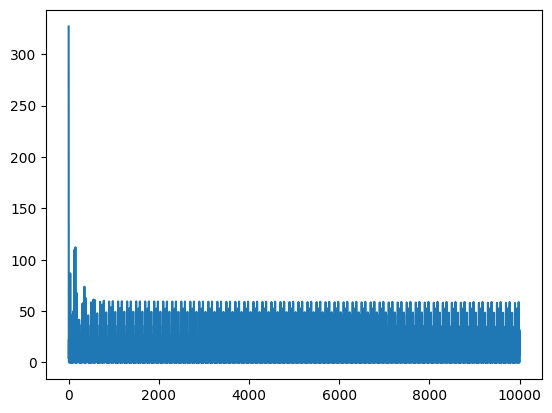

In [153]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

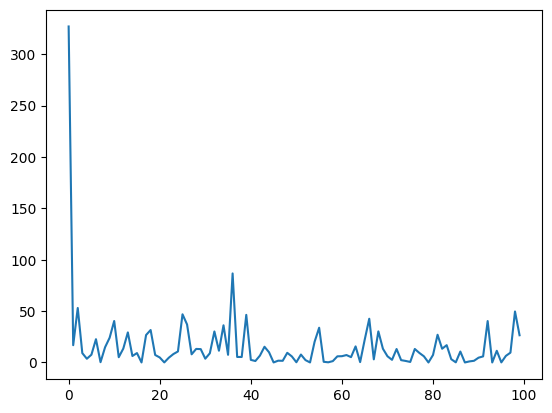

In [156]:
plt.plot(losses[:100])
plt.show()

In [157]:
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


### Predict New data

In [158]:
tv = 19.2
radio = 35.9 
newspaper = 51.3

sales = predict(1, 1, 1, 0, 0.5, 0, 0.5)
print(f'predicted sales is {sales}')

# 8.176413319549823

predicted sales is 1.0
